# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

the exchange rate is used as a reference for a company to determine its sales and purchases, not only that the exchange rate also affects the company's profits and losses

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

here we give permission to do webscraping, by writing the web address

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. the first step is to right click on the web then click inspection. then choose the code that blocks the table and apply it to our application

In [5]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-05-12">
     May 12, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-05-12">
     2023-5-12
    </a>
   </td>
   <td>
    <span class="w">
     <span class="now


Finding row length. find line length of code line length we want in web

In [6]:
baris1 = table.find_all('a', attrs={'class':'w'})
row_length = len(baris1)
row_length

130

Do the scrapping process here. 
here we take the name of the data starting from the date and exchange rates, we can also change the name of the table according to our wishes

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    Date = table.find_all('a', attrs={'class':'w'})[i].text
    USDolar_IDR = table.find_all('span', attrs={'class':'n'})[i].text
    temp.append((Date, USDolar_IDR))

temp 

[('May 12, 2023', '$1 = Rp14,844'),
 ('May 11, 2023', '$1 = Rp14,776'),
 ('May 10, 2023', '$1 = Rp14,698'),
 ('May 9, 2023', '$1 = Rp14,776'),
 ('May 8, 2023', '$1 = Rp14,744'),
 ('May 5, 2023', '$1 = Rp14,675'),
 ('May 4, 2023', '$1 = Rp14,699'),
 ('May 3, 2023', '$1 = Rp14,680'),
 ('May 2, 2023', '$1 = Rp14,747'),
 ('May 1, 2023', '$1 = Rp14,677'),
 ('April 28, 2023', '$1 = Rp14,674'),
 ('April 27, 2023', '$1 = Rp14,691'),
 ('April 26, 2023', '$1 = Rp14,841'),
 ('April 25, 2023', '$1 = Rp14,940'),
 ('April 24, 2023', '$1 = Rp14,934'),
 ('April 21, 2023', '$1 = Rp14,936'),
 ('April 20, 2023', '$1 = Rp14,954'),
 ('April 19, 2023', '$1 = Rp14,995'),
 ('April 18, 2023', '$1 = Rp14,889'),
 ('April 17, 2023', '$1 = Rp14,850'),
 ('April 14, 2023', '$1 = Rp14,782'),
 ('April 13, 2023', '$1 = Rp14,722'),
 ('April 12, 2023', '$1 = Rp14,835'),
 ('April 11, 2023', '$1 = Rp14,915'),
 ('April 10, 2023', '$1 = Rp14,950'),
 ('April 7, 2023', '$1 = Rp14,941'),
 ('April 6, 2023', '$1 = Rp14,931'),
 ('

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date', 'USDolar_IDR'))
df.head()

,Date,USDolar_IDR
0,"May 12, 2023","$1 = Rp14,844"
1,"May 11, 2023","$1 = Rp14,776"
2,"May 10, 2023","$1 = Rp14,698"
3,"May 9, 2023","$1 = Rp14,776"
4,"May 8, 2023","$1 = Rp14,744"


change the date data type from object to datetime and change USDol_IDR from object to float 64. Then remove $1, =, Rp and , with the str.replace command. in that way the data can be processed by the system

In [9]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['USDolar_IDR'] = df['USDolar_IDR'].str.replace('$1','')
df['USDolar_IDR'] = df['USDolar_IDR'].str.replace('=','')
df['USDolar_IDR'] = df['USDolar_IDR'].str.replace('Rp','')
df['USDolar_IDR'] = df['USDolar_IDR'].str.replace(',','')
df['USDolar_IDR'] = df['USDolar_IDR'].astype('float64')
df.dtypes

Date           datetime64[ns]
USDolar_IDR           float64
dtype: object

In [32]:
df.head()

,Date,USDolar_IDR
0,2023-05-11,14776.0
1,2023-05-10,14698.0
2,2023-05-09,14776.0
3,2023-05-08,14744.0
4,2023-05-05,14675.0


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [34]:
df1 = df.set_index('Date')

<Axes: xlabel='Date'>

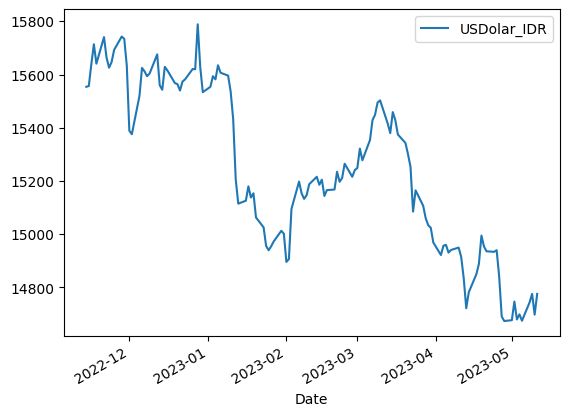

In [35]:
df1.plot()


the highest exchange rate against the USD Dollar was on 28 December 2022 with a value of IDR 15789, the lowest exchange rate was on 28 April 2023 with a value of IDR 14674, with an average exchange rate of IDR 15240

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.